- FUNCTION plot, subplot
- Cycle de vie des figures
- OOP subplotS (fix, ax)


# MATPLOTLIB, LES BASES

[video 14](https://www.youtube.com/watch?v=O_OeWxpnUc0)

[Cheatsheet markdown](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)
__Bien definir le probleme avant de penser au graphique !__

Ne pas confondre les methodes orientees objets (OOP) et les methodes basiques plt.plot()

### FONCTIONS
plt.plot(x, y)

plt.show()

### OOP
fig, ax = plt.subplots()

ax.plot(x,y)

plt.show()

# FONCTIONS 
## PYPLOT PLT

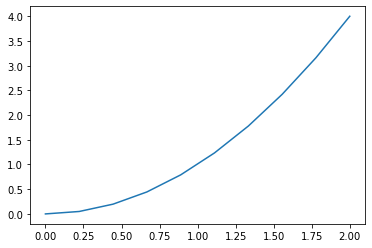

In [108]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0,2,10)
y = x**2

plt.plot(x,y)
plt.show()

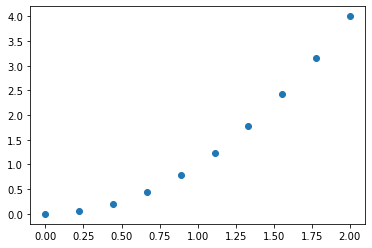

In [109]:
plt.scatter(x,y)
plt.show()

plot(x, y, label = ..., lw = ..., ls = ..., c = ...)
- label = nom de la courbe
- lw = epaisseur du trait
- ls = style du trait
- c = couleur

__faites simple__

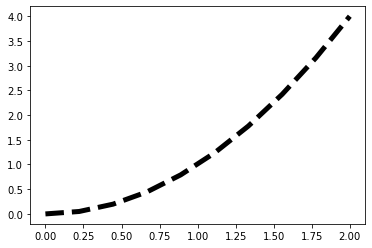

In [110]:
plt.plot(x,y, c = 'black', lw = 5, ls = '--')
plt.show()

## Cycle de vie d'une figure

plt.figure() initie la figure. On peut alors faire nos traces ensuite

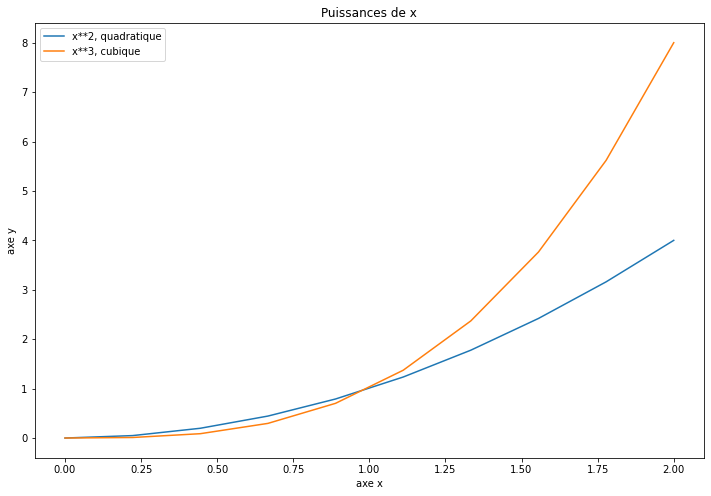

In [111]:
plt.figure(figsize=(12, 8)) #figsize en inches (pouces)
plt.plot(x, y, label = 'x**2, quadratique')
plt.plot(x, x**3, label = 'x**3, cubique')
plt.xlabel("axe x")
plt.ylabel("axe y")
plt.title("Puissances de x")
plt.legend()
plt.savefig("figure.png")
plt.show()

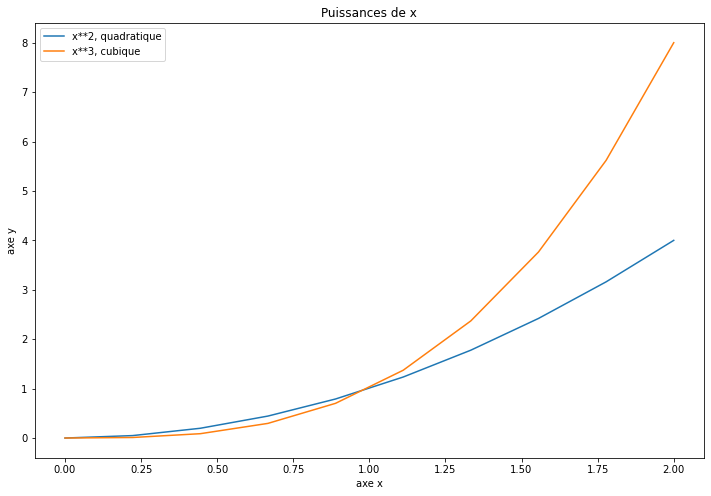

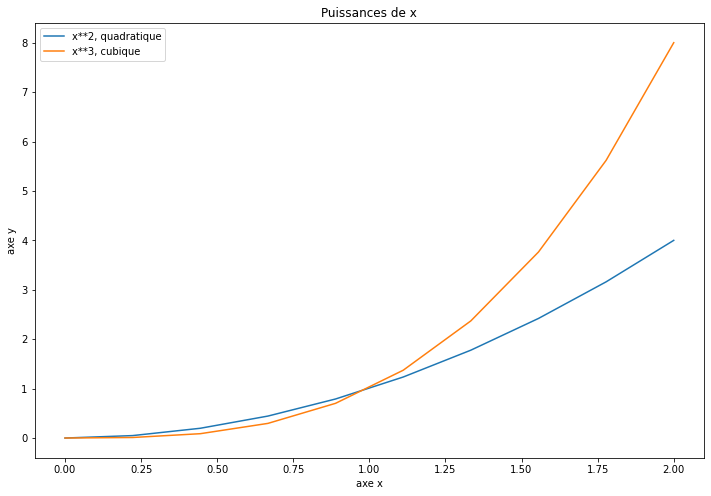

In [112]:
# FIGURE 1  
plt.figure(figsize=(12, 8)) #figsize en inches (pouces)
plt.plot(x, y, label = 'x**2, quadratique')
plt.plot(x, x**3, label = 'x**3, cubique')
plt.xlabel("axe x")
plt.ylabel("axe y")
plt.title("Puissances de x")
plt.legend()
# plt.savefig("figure.png")
plt.show()
# FIGURE 2
plt.figure(figsize=(12, 8)) #figsize en inches (pouces)
plt.plot(x, y, label = 'x**2, quadratique')
plt.plot(x, x**3, label = 'x**3, cubique')
plt.xlabel("axe x")
plt.ylabel("axe y")
plt.title("Puissances de x")
plt.legend()
# plt.savefig("figure.png")
plt.show()

## Fonction subplot(lignes, colonnes, position) 

position c'est le nombre si on sommait l'index + 1, du tableau.ravelled()

2,2,1 / 2,2,2

2,2,3 / 2,2,4



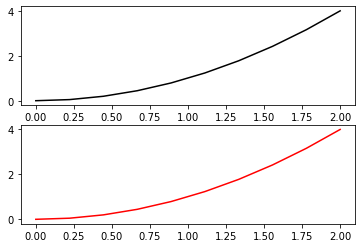

In [113]:
plt.subplot(2,1,1)
plt.plot(x, y, c='black')
plt.subplot(2,1,2)
plt.plot(x, y, c='red')
plt.show()

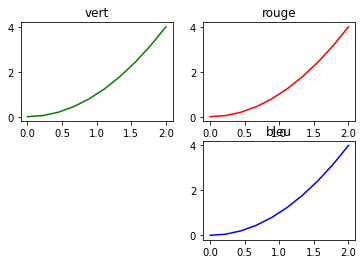

In [114]:
plt.subplot(2,2,1)
plt.plot(x, y, c='green')
plt.title("vert")
plt.subplot(2,2,2)
plt.plot(x, y, c='red')
plt.title("rouge")
# plt.subplot(2,2,3)
# plt.plot(x, y, c='black')
plt.subplot(2,2,4)
plt.plot(x, y, c='blue')
plt.title("bleu")
plt.show()

# OOP METHODE

On peut faire des choses un peu plus sympa

__N.B : plt.plot() suffit pour 99% des graphiques__

suplots AVEC UN S

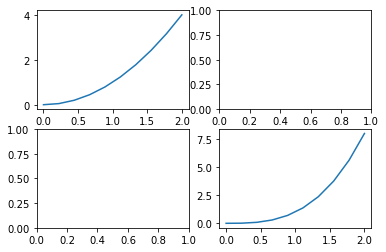

In [115]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0][0].plot(x,y)
ax[1][1].plot(x,x**3)
plt.show()

Lorsqu'on cree des supblots avec plusieurs lignes ou colonnes, on cree des __tableaux numpy (ax)__

In [116]:
print("type : ", type(ax))
print("shape : ", ax.shape)

type :  <class 'numpy.ndarray'>
shape :  (2, 2)


Dimension incomplete explique pourquoi on ne fait pas reference au premier element en faisant [0][1]

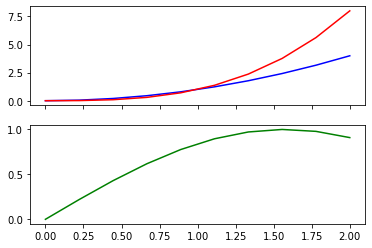

In [117]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].plot(x,y, c='blue')
ax[0].plot(x,x**3, c='red')
ax[1].plot(x, np.sin(x), c='green')
plt.show()

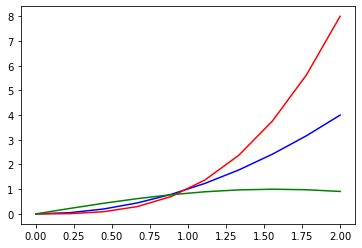

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
ax.plot(x,y, c='blue')
ax.plot(x,x**3, c='red')
ax.plot(x, np.sin(x), c='green')
plt.show()

A l'interieur des subplots, on definit ce qu'on aimerait avoir : quel titre, quel legende, etc.

# Exercice

Tracer sur une seule et meme figure plusieurs graphiques issus de N datasets

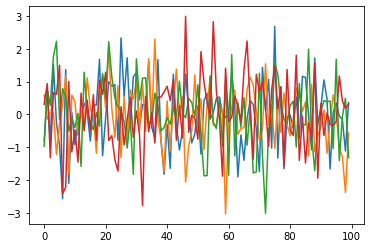

In [119]:
def graphique(dataset) :
    plt.figure()
    xaxis = [i for i in range(100)]
    for i in range(len(dataset.keys())) :
        plt.plot(xaxis, dataset[f"experience{i}"])
    plt.show()
    return

dataset = {
    f"experience{i}" : np.random.randn(100) for i in range(4)
}

graphique(dataset=dataset)

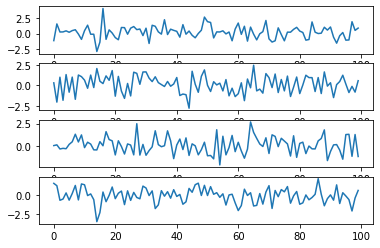

In [120]:
def graphique(dataset) :
    plt.figure()
    xaxis = [i for i in range(100)]
    for i in range(len(dataset.keys())) :
        plt.subplot(len(dataset.keys()), 1, i+1)
        plt.plot(xaxis, dataset[f"experience{i}"])
    plt.show()
    return

dataset = {
    f"experience{i}" : np.random.randn(100) for i in range(4)
}

graphique(dataset=dataset)

### Mieux en OOP pour pouvoir partager l'axe des abscisses et moins surcharger le graph

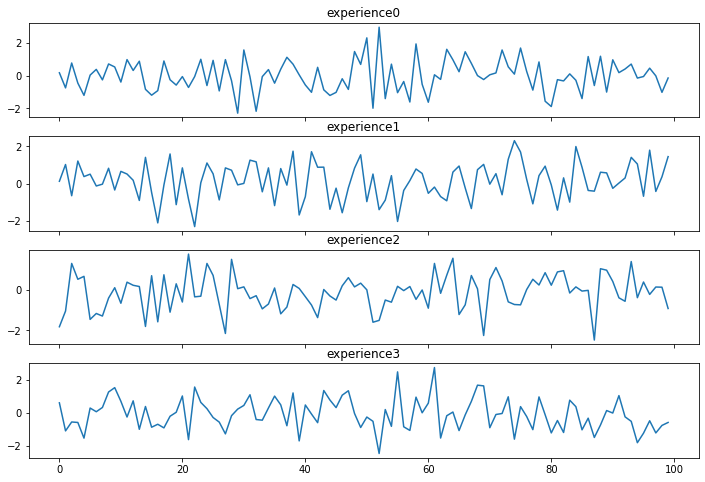

In [152]:
def graphique(dataset) :
    dtsize = len(dataset)
    fig, ax = plt.subplots(dtsize, 1, sharex=True)
    fig.set_size_inches(12, 8)
    xaxis = [i for i in range(100)]
    for i in range(len(dataset.keys())) :
        ax[i].plot(xaxis, dataset[f"experience{i}"])
        ax[i].set_title(f'experience{i}')
    plt.show()
    return

dataset = {
    f"experience{i}" : np.random.randn(100) for i in range(4)
}

graphique(dataset=dataset)

In [122]:
type(fig)

matplotlib.figure.Figure

#### Correction

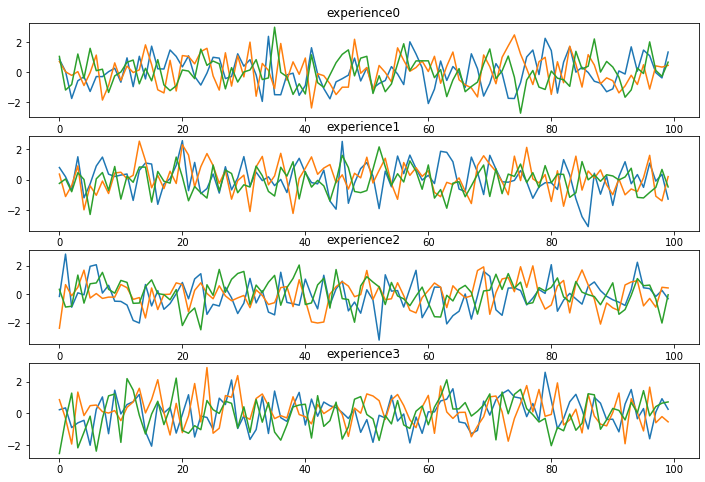

In [154]:
def graphique(data) :
    n = len(data)
    plt.figure(figsize=(12,8))
    for k, i in zip(data.keys(), range(1, n+1)) :
        plt.subplot(n, 1, i)
        plt.plot(data[k])
        plt.title(k)
    plt.show()
    return

dataset = {
    f"experience{i}" : np.random.randn(100, 3) for i in range(4) #si je collecte 3 signaux distincts, ils seront tous plotes sur le mm graph
}

graphique(data=dataset)

# Video 15 : Graphiques de ML

[video 15](https://www.youtube.com/watch?v=MILtbfrMGL4)

## 5. Scatter classification

Problemes de classification passent souvent par des scatter.

- Probleme classic : trier les emails comme spam ou non spam : etudier le nombre de fautes, le nombre de liens, etc.

Quand on a plusieurs classes a mettre en valeur, le graphique plt.scatter() peut etre tres utiles

#### le dataset des fleurs d'IRIS

3 classes = Setosa, Versicolor et Virginica dependendante de la longeur et de la largeur du petal, ainsi que de la longeur et la largeur du sepal

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [124]:
iris = load_iris()

x = iris.data
y = iris.target
names = list(iris.target_names)

print(f"x contient {x.shape[0]} exemples et {x.shape[1]} variables")
# print(x)
print(f'il y a {np.unique(y).size} classes')
# print(y)


x contient 150 exemples et 4 variables
il y a 3 classes


## 5. Graphique de classification

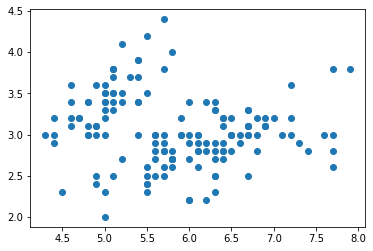

In [125]:
# x[:,0] premiere variable, car premiere colonne
plt.scatter(x[:,0], x[:,1])
plt.show()

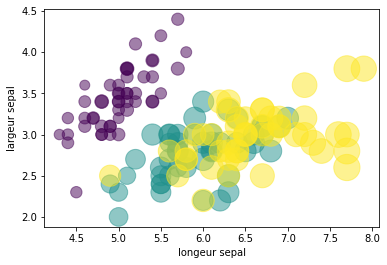

In [126]:
# Colorier ces points en fonctions de la nature de leur classe
plt.scatter(x[:,0], x[:,1], c=y, alpha=0.5, s=x[:,2]*100) #y etant les 150 instances de classe associees a nos points #s=size des points
# x[:,2] longueur du petal
plt.xlabel("longeur sepal")
plt.ylabel("largeur sepal")
plt.show()

Charbonneurs : Nombre d'abonnes moyens Vs. nombre de vues moyennes

Couleurs : par courant politique

## 4. Graphiques en 3D

mpl toolkit, un des subpackages de matplotlib

POO OBLIGATOIRE

In [127]:
from mpl_toolkits.mplot3d import Axes3D

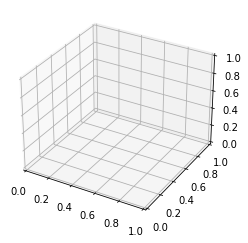

In [128]:
ax = plt.axes(projection = '3d')

In [129]:
print("type :", type(ax))

type : <class 'matplotlib.axes._subplots.Axes3DSubplot'>


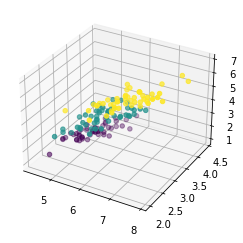

In [130]:
x = iris.data
y = iris.target

#  Permet d'afficher une fenetre interactive pour matplotlib :  %matplotlib
%matplotlib inline
ax = plt.axes(projection = '3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=y)
plt.show()

[aide couleurs cmaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

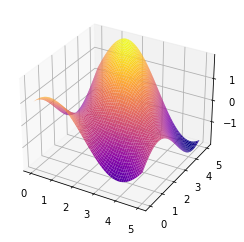

In [131]:
%matplotlib inline
# Faire une carpette
f = lambda x,y : np.sin(x) + np.cos(x+y)
# On definit les axes d'abscisses et d'ordonnees
X = np.linspace(0,5,100)
Y = np.linspace(0,5,100)

# On fait le meshgrid
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)
Z.shape

ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'plasma')
plt.show()

## 3. Histogramme

Permet de voir la distribution des donnees avec lesquelles on travaille (normale, gaussienne, ou est la moyenne, etc.)

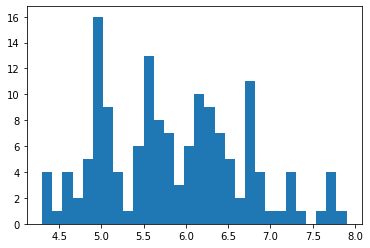

In [132]:
x = iris.data
y = iris.target

plt.hist(x[:,0], bins=30) # bins = nombre de sections de notre histogramme
plt.show()
# Donne le nombre d'apparition pour chacune des valeurs, qui vont de 4.5 a 7.5+

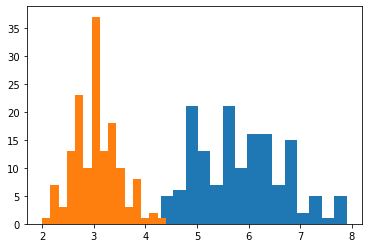

In [133]:
plt.hist(x[:,0], bins=15) # bins = nombre de sections de notre histogramme
plt.hist(x[:,1], bins=15) # bins = nombre de sections de notre histogramme
plt.show()

On peut faire des histogramme en 2D pour etudier la distribution des donnees lorsqu'elles suivent deux variables

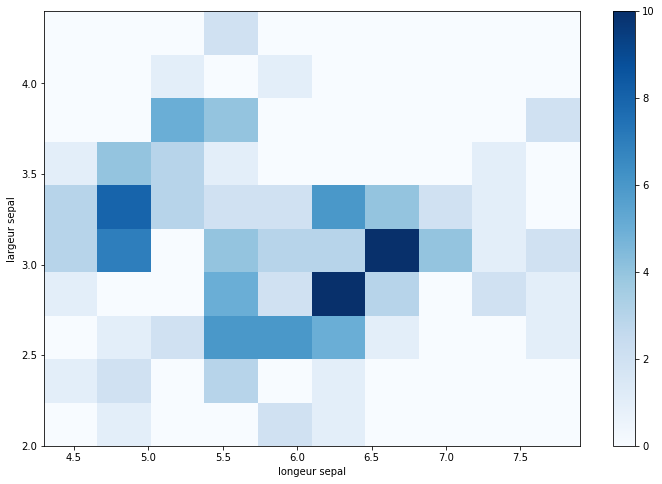

In [134]:
plt.figure(figsize=(12,8))
plt.hist2d(x[:,0], x[:,1], cmap = 'Blues')
plt.xlabel('longeur sepal')
plt.ylabel('largeur sepal')
plt.colorbar() # Nous indique le code couleur associe a la frequence
plt.show()

#### Histogramme en traitement d'image

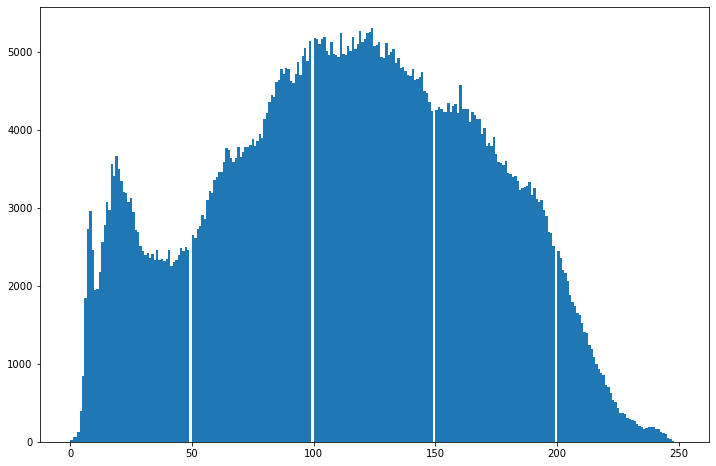

In [135]:
from scipy import misc

face = misc.face(gray=True)
plt.figure(figsize=(12, 8))
# plt.imshow(face, cmap='gray')
plt.hist(face.ravel(), bins=255) #ravel() : applati le tableau de pixels
plt.show()
# Frequence d'apparation des differentes couleurs de pixels (peut dire si l'image est plutot sombre ou claire)

## 2. Contour plot

Projeter un modele en 3D sur un plan en 2D

Utile pour les problemes de local minimum Vs. global minimum

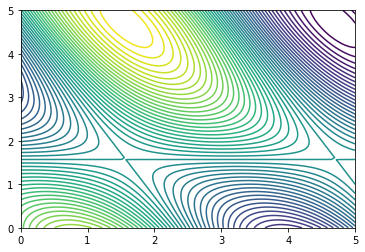

In [136]:
plt.contour(X, Y, Z, 50)

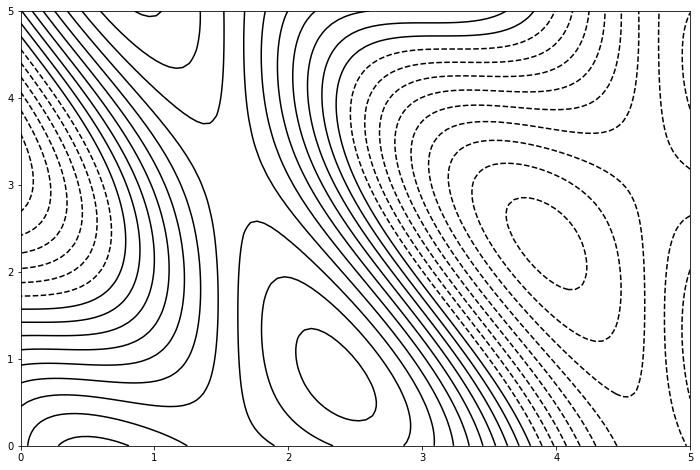

In [137]:
g = lambda x,y : np.sin(x) + np.cos(x+y)*np.cos(x)
G = g(X, Y)
plt.figure(figsize=(12, 8))
plt.contour(X, Y, G, 20, colors = 'black')
# Tout ce qui est positif s'inscrit en trait plein
# Tout ce qui est negatif s'inscrit en tirets

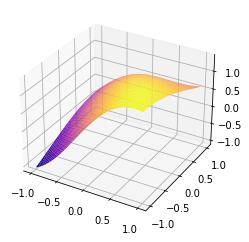

In [138]:
X = np.linspace(-1,1,40)
Y = np.linspace(-1,1, 40)
X, Y = np.meshgrid(X, Y)
G = g(X, Y)
G.shape

ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, G, cmap = 'plasma')

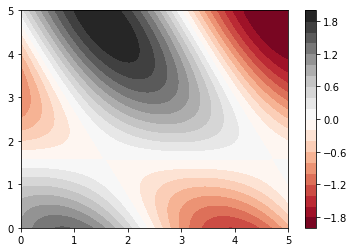

In [142]:
X = np.linspace(0, 5, 100)
Y = np.linspace(0, 5, 100)
G = g(X, Y)
plt.contourf(X, Y, Z, 20, cmap = 'RdGy')
plt.colorbar()
plt.show()

# 1. Imshow()

Permet d'afficher n'importe quel tableau numpy
- Matrice de correlation
- Optimisation des chemins possibles
- On va pouvoir afficher un mask avant de s'en servir dans du boolean indexing

In [143]:
iris = load_iris()

x = iris.data
y = iris.target
names = list(iris.target_names)

print(f"x contient {x.shape[0]} exemples et {x.shape[1]} variables")
print(f'il y a {np.unique(y).size} classes')

x contient 150 exemples et 4 variables
il y a 3 classes


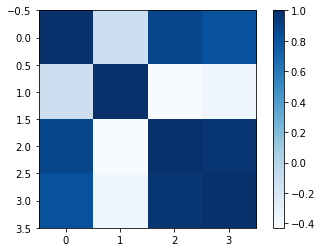

In [147]:
# Matrice de correlation pour notre tableau X des caracteristiques de fleurs
plt.imshow(np.corrcoef(x.T), cmap='Blues')
plt.colorbar()
plt.show()

__permet de voir quelles variables ont une tres forte correlation. Tres important surtout quand on a beaucoup de variables__

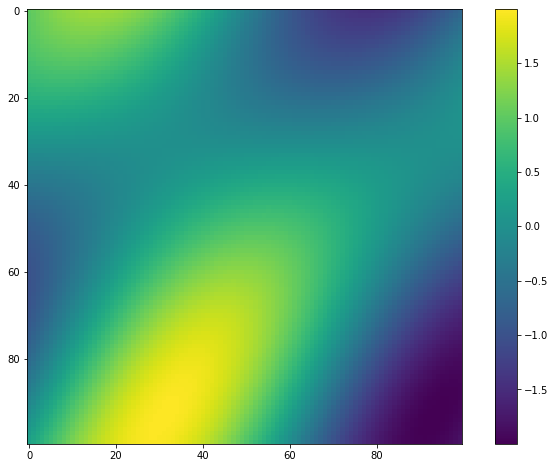

In [151]:
plt.figure(figsize=(12, 8))
plt.imshow(Z)
plt.colorbar()
plt.show()

# Exercice V15

Afficher sur une meme figure, les differentes variables que l'on a pour notre dataset de l'iris

In [155]:
iris = load_iris()

x = iris.data
y = iris.target
names = list(iris.target_names)

print(f"x contient {x.shape[0]} exemples et {x.shape[1]} variables")
# print(x)
print(f'il y a {np.unique(y).size} classes')

x contient 150 exemples et 4 variables
il y a 3 classes


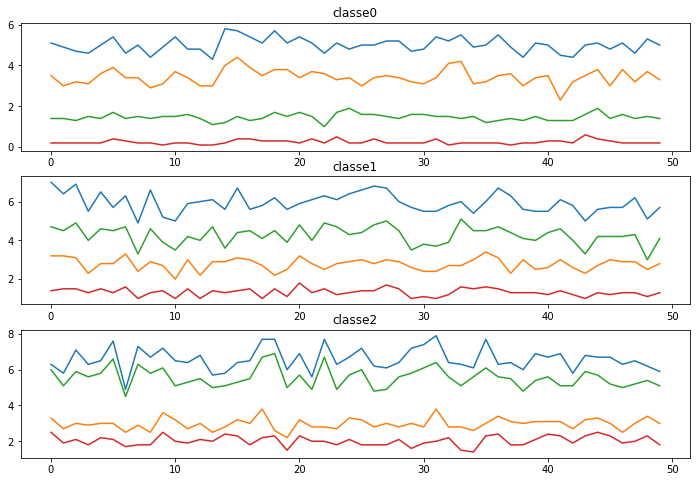

In [163]:
def graphique(data, classe) :
    liste_classe = np.unique(classe)
    n = liste_classe.size
    plt.figure(figsize=(12,8))
    for i in range(1, n+1) :
        plt.subplot(n, 1, i)
        plt.plot(data[classe == liste_classe[i-1]])
        plt.title(f"classe{liste_classe[i-1]}")
    plt.show()
    return

graphique(x, y)

On en a 50 de chaque

Pour chacune, on a pris les mesures de 4 parametres